## Modelado de datos continuos

- Se ha hablado mucho durante los últimos años sobre la necesidad de que el departamento de RRHH sea más estratégico. 

- Aparte de cualquier debate filosófico sobre la verdadera naturaleza de la "estrategia" y el pensamiento estratégico, lo que esto normalmente significa es que los líderes empresariales quieren que los departamentos de RRHH sean más como sus departamentos de marketing: analíticos, orientados a los resultados y capaces de vincular directamente sus actividades con los resultados deseados por la empresa. 

- Las empresas de marketing de hoy dependen bastante del análisis predictivo y la minería de datos/ciencia de datos. 
  - Es probable que el futuro de los recursos humanos se encuentre en este mismo camino. 

- Este ejercicio explora un problema potencial con el que un profesional de RRHH estratégico-analítico podría razonablemente esperar enfrentarse.

### Problema: Creative HR

- La empresa Creative HR está analizando los factores de pérdida de personal (**Attrition**). 
- El departamento de recursos humanos a recopilado información demográfica y de educación de sus actuales y antiguos empleados.
- El departamento de recursos humanos pretende modelar la edad de sus empleados siguiendo una distribución normal. 

**Archivo de datos:**  

- [CS_data.csv](https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv)

- Lea el archivo csv. 
  
```Python
import pandas as pd
import seaborn as sns

data = pd.read_csv("../data/CHR_data.csv")  # si la estructura es la del repositorio de GitHub

# si está trabajando en local y el archivo de datos y el notebook están en el mismo directorio
# data = pd.read_csv("CHR_data.csv") 

# También puede leer el archivo desde el repositorio de GitHub.
#data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")
```

1.**(2 pt)** Cuál es la distribución de la edad (**Age**). 

  - Escriba el código Python para replicar el gráfico a continuación. 
    - El diagrama de densidad para la variable **Age**.
    - Una distribución normal $X \sim N(\mu, \sigma)$, donde $\mu$ es la media y $\sigma$ 
    la desviación estándar de los datos (**Age**).
    
 ![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/age_norm.png)
 
2.**(2 pt)** Cuál es la probabilidad de que un trabajador de Creative HR tenga 30 años o menos. 
  - Responda usando los datos observados y el modelo asumido.
  
3.**(2 pt)** Analice la edad de los trabajadores (**Age**) con respecto a si el trabajador se encuentra o no en la empresa (**Attrition**). 
  - Escriba el código Python para replicar el gráfico a continuación. 
    - El diagrama de densidad para la variable **Age**.
    - Una distribución normal $X \sim N(\mu, \sigma)$, donde $\mu$ es la media y $\sigma$ 
    la desviación estándar de la edad (**Age**) de acuerdo a si se encuentra aún en la empresa (**Attrition**).
    
 ![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/age_attrition.png)

4.**(2 pt)** Cuál es la probabilidad de que un trabajador que ya no se encuentra en Creative HR tenga 30 años o menos. 
  - Responda usando los datos observados y el modelo asumido.

5.**(2 pt)** Discuta qué tan adecuada considera la distribución usada para modelar nuestros datos observados.

6. **Opcional**

  - Grafique los datos en un mismo panel.
  
![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/age_hue.png)


### Fuentes y recursos:

- https://www.kaggle.com/jamestollefson/modeling-the-business-cost-of-retention/notebook

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm  # Para el deber
from scipy.stats import expon  # Para el ejemplo
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Revise MLE para la distribución exponencial

  - https://stats.stackexchange.com/questions/498228/exponential-distribution-log-likelihood-and-maximum-likelihood-estimator

<AxesSubplot: xlabel='DistanceFromHome', ylabel='Density'>

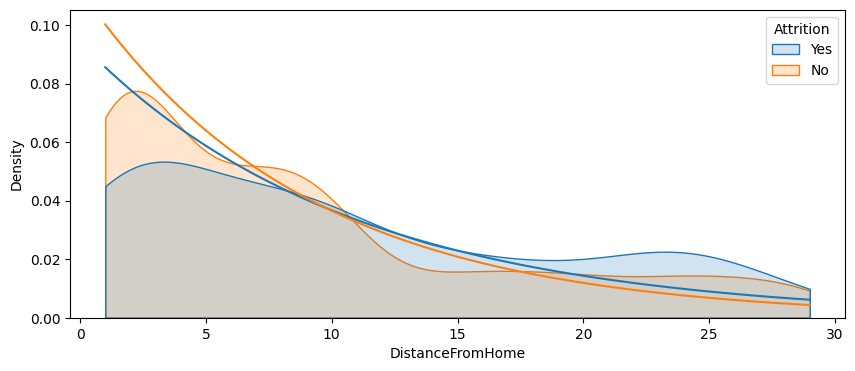

In [2]:
# Utilizaremos una dist exponencial para modelar los datos observados
from scipy.stats import expon

plt.figure(figsize=(10,4))

# Genero 100 valores igulamente espaciados en el rango de valores observados
x = np.linspace(data.DistanceFromHome.min(), data.DistanceFromHome.max(), 100)

# Filtrar los datos usando data.query, para Attrtion == Yes
sum_x_yes = data.query('Attrition == "Yes"')["DistanceFromHome"].sum()
n_yes = data.query('Attrition == "Yes"')["DistanceFromHome"].count()

# This is lamda yes
l_yes = n_yes / sum_x_yes  # This is MLE for lambda for Attrition==Yes
l_yes = 1 / data.query('Attrition == "Yes"')["DistanceFromHome"].mean()

# Python esperar como parametro beta = 1/lambda
# Modelo para attrition Yes
plt.plot(x, expon.pdf(x, scale=1/l_yes), label='Model Yes')
# Podemos desplazar la distribucion
#plt.plot(x, expon.pdf(x, scale=1/l_yes-x.min(), loc=x.min()), label='Yes')

sum_x_no = data.query('Attrition == "No"')["DistanceFromHome"].sum()
n_no = data.query('Attrition == "No"')["DistanceFromHome"].count()

# This is lambda no
l_no = n_no / sum_x_no  # This is lambda for Attrition==No
l_no = 1 / data.query('Attrition == "No"')["DistanceFromHome"].mean()

# Modelo para attrition No
plt.plot(x, expon.pdf(x, scale=1/l_no), label='Model No')
# Podemos desplazar la distribucion
#plt.plot(x, expon.pdf(x, scale=1/l_no-x.min(), loc=x.min()), label='No')

plt.legend();
sns.kdeplot(data=data, x="DistanceFromHome", cut=0, 
            fill=True, hue="Attrition", 
            common_norm=False, alpha=0.2, legend=True)

### Respondamos probabilidades para cada grupo, $\{Yes, No\}$

- $P(X \leq 10)$
- $P(5 \leq X \leq 15)$

In [3]:
data_no = data.query('Attrition == "No"')["DistanceFromHome"]
data_yes = data.query('Attrition == "Yes"')["DistanceFromHome"]

print("Para Attritions == No")
print("Model: P(X<=10) = F(10) =", expon.cdf(10, scale=1/l_no))
print("Datos: P(X<=10) =", len(np.where(data_no <= 10)[0]) / len(data_no))

print("Model: P(5<=X<=15) = F(15) - F(5)", expon.cdf(15, scale=1/l_no) - expon.cdf(5, scale=1/l_no))
print("Datos: P(5<=X<=10) =", len(np.where((data_no >= 5) & (data_no <= 15))[0]) / len(data_no))

print("Para Attritions == Yes")
print("Model: P(X<=10) =", expon.cdf(10, scale=1/l_yes))
print("Datos: P(X<=10) =", len(np.where(data_yes <= 10)[0]) / len(data_yes))

print("Model: P(5<=X<=15) =", expon.cdf(15, scale=1/l_yes) - expon.cdf(5, scale=1/l_yes))
print("Datos: P(5<=X<=10) =", len(np.where((data_yes >= 5) & (data_yes <= 15))[0]) / len(data_yes))

Para Attritions == No
Model: P(X<=10) = F(10) = 0.6742492794167291
Datos: P(X<=10) = 0.7153284671532847
Model: P(5<=X<=15) = F(15) - F(5) 0.3848249162437457
Datos: P(5<=X<=10) = 0.3909164639091646
Para Attritions == Yes
Model: P(X<=10) = 0.6095581336145705
Datos: P(X<=10) = 0.6075949367088608
Model: P(5<=X<=15) = 0.38088451857223654
Datos: P(5<=X<=10) = 0.3881856540084388


### Tarea (Modelar usando distribución normal)

In [4]:
# Mu y sigma provienen de la muestra
mu, sigma = data.Age.mean(), data.Age.std()
mu, sigma

(36.923809523809524, 9.135373489136732)

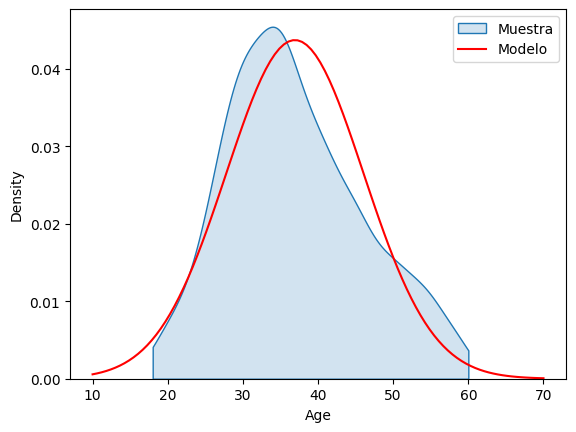

In [5]:
# Esto es para graficar
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm  # Para el deber
from scipy.stats import expon  # Para el ejemplo
import matplotlib.pyplot as plt

# Parámetros de la distribución normal (nuestro modelo)
# ddof=0, calcula la var o std usando n-ddof
# ddof=0 para el MLE de la varianza
# Este codigo replicar para cada grupo (attriton yes, no)
# media_yes, sigma_yes, media_no, sigma_no 
media, desviacion = data.Age.mean(), data.Age.std(ddof=0)

# Density plot (gráfico sombreado, es nuestros datos, la muestra)
sns.kdeplot(data=data, x="Age", cut=0, fill=True, common_norm=False, 
    alpha=0.2, label="Muestra")

# Modelo
# Definimos valores mínimos y máximos para evaluar la PDF
x = np.linspace(10, 70, 100)
# Evaluavos la PDF para esos valores de x, esto da la curva del modelo
pdf_x = norm.pdf(x, media, desviacion)
plt.plot(x, pdf_x, c='r', label='Modelo')
plt.legend()

### Para replicar la PDF para dos grupos

- Filtre los datos por Attrition: [Yes, No]
- Calcule la media y desviación para grupo. 
  - Use estos valores para evaluar la PDF en el rango de los datos.
- Revise el ejercicio para la distribución exponencial arriba. 

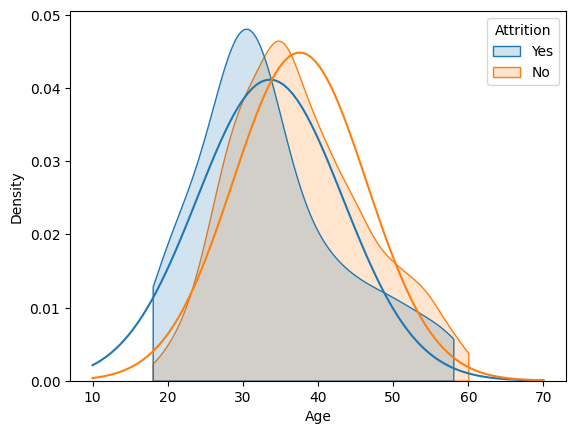

In [6]:
sns.kdeplot(data=data, x="Age", hue="Attrition", cut=0, fill=True, common_norm=False, alpha=0.2)

# Filtrar datos
att_yes = data.query('Attrition == "Yes"')["Age"]
att_no = data.query('Attrition == "No"')["Age"]

# Calcular media y desviación para Att_yes
mu_yes, sigma_yes = att_yes.mean(), att_yes.std()
# Evaluar PDF para mu_yes, sigma_yes
pdf_x = norm.pdf(x, mu_yes, sigma_yes)
plt.plot(x, pdf_x)

# Calcular media y desviación para Att_no
mu_no, sigma_no = att_no.mean(), att_no.std()
# Evaluar PDF para mu_no, sigma_no
pdf_x = norm.pdf(x, mu_no, sigma_no)
plt.plot(x, pdf_x)

In [7]:
# Usar para cada modelo N(mu_no, sigma_no), N(mu_yes, sigma_yes)
print("Modelo P(X<=50 | Att_no) =", norm.cdf(50, mu_no, sigma_no))
print("Modelo P(X<=50 | Att_yes) =", norm.cdf(50, mu_yes, sigma_yes))

Modelo P(X<=50 | Att_no) = 0.9191601463342092
Modelo P(X<=50 | Att_yes) = 0.9546575781438411


In [8]:
# Evaluar en las muestras att_no y att_yes
print("Muestra P(X<=50 | Att_no) =", len(np.where(att_no <= 50)[0])/len(att_no)) 
print("Muestra P(X<=50 | Att_yes) =", len(np.where(att_yes <= 50)[0])/len(att_yes))

Muestra P(X<=50 | Att_no) = 0.8986212489862125
Muestra P(X<=50 | Att_yes) = 0.9240506329113924


In [9]:
print("Modelo P(20<=X<=30 | Att_no) =", 
norm.cdf(30, mu_no, sigma_no) - norm.cdf(20, mu_no, sigma_no))

Modelo P(20<=X<=30 | Att_no) = 0.17337978832307513


In [10]:
print("Muestra P(20<=X<=30 | Att_no) =", 
len(np.where((att_no >= 20) & (att_no <=30))[0])/len(att_no))

Muestra P(20<=X<=30 | Att_no) = 0.22627737226277372


KS test for No:
 KstestResult(statistic=0.0823141645578111, pvalue=1.0256677438570993e-07)
KS test for Yes:
 KstestResult(statistic=0.1199898386974606, pvalue=0.0019750379768559948)


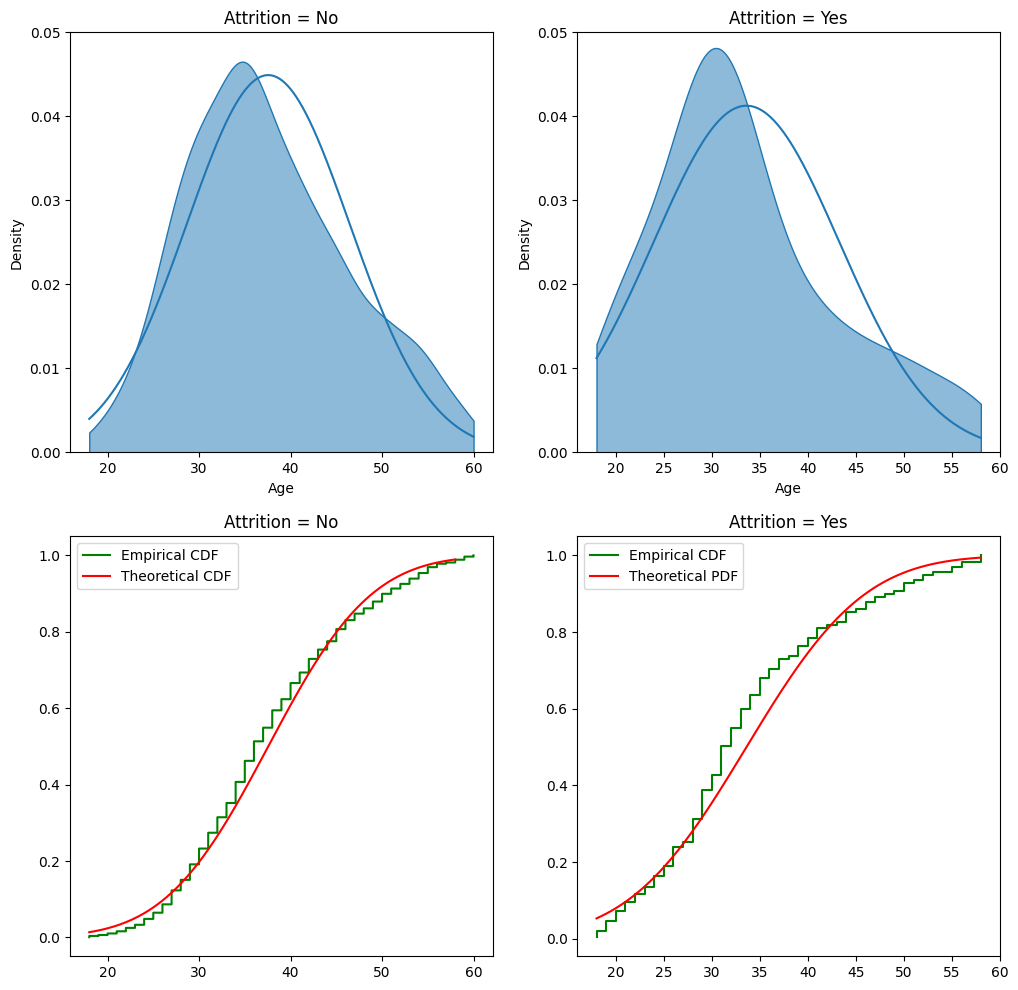

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats

# fitting normal distribution for att_no
loc_n, scale_n = stats.norm.fit(att_no)

# fitting normal distribution for att_yes
loc_y, scale_y = stats.norm.fit(att_yes)

# limits to evaluate PDF
xmin, xmax = min(att_no), max(att_no) 
x = np.linspace(xmin, xmax, len(att_no))

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)

plt.plot(x, norm.pdf(x, loc_n, scale_n))
sns.kdeplot(att_no, fill=True, alpha=0.5, cut=0)
plt.title("Attrition = No")
plt.ylim(0, 0.05)

plt.subplot(2,2,2)

# limits to evaluate PDF and CDF
xmin, xmax = min(att_yes), max(att_yes) 
x = np.linspace(xmin, xmax, len(att_yes))

plt.plot(x, norm.pdf(x, loc_y, scale_y))
sns.kdeplot(att_yes, fill=True, alpha=0.5, cut=0)
plt.title("Attrition = Yes")
plt.ylim(0, 0.05)


plt.subplot(2,2,3)
# Calculate empirical cdf of att_no
ecdf = ECDF(att_no)
# Plot empirical cdf as step function
plt.step(ecdf.x, ecdf.y, "g", label="Empirical CDF")

# Plot model CDF 
cdf_no = stats.norm.cdf(x, loc=loc_n, scale=scale_n)
plt.plot(x, cdf_no, '-r', label="Theoretical CDF")
plt.title("Attrition = No")
plt.legend()

plt.subplot(2,2,4)
# Calculate empirical cdf of att_yes
ecdf = ECDF(att_yes)
# Plot empirical cdf as step function
plt.step(ecdf.x, ecdf.y, "g", label="Empirical CDF")

xmin, xmax = min(att_yes), max(att_yes) 
x = np.linspace(xmin, xmax, len(att_yes))

# fitting normal distribution
loc_y, scale_y = stats.norm.fit(att_yes)

cdf_yes = stats.norm.cdf(x, loc=loc_y, scale=scale_y)
plt.plot(x, cdf_yes, '-r', label="Theoretical PDF")
plt.title("Attrition = Yes")
plt.legend();

print("KS test for No:\n", stats.kstest(att_no, "norm", (loc_n, scale_n)))
print("KS test for Yes:\n", stats.kstest(att_yes, "norm", (loc_y, scale_y)))

In [14]:
print("mu_no, sigma_no =", (loc_n, scale_n))
print("mu_yes, sigma_yes =", (loc_y, scale_y))

data.groupby("Attrition").std(ddof=0)["Age"]

mu_no, sigma_no = (37.561232765612324, 8.884754930516747)
mu_yes, sigma_yes = (33.607594936708864, 9.668886620354689)


Attrition
No     8.884755
Yes    9.668887
Name: Age, dtype: float64

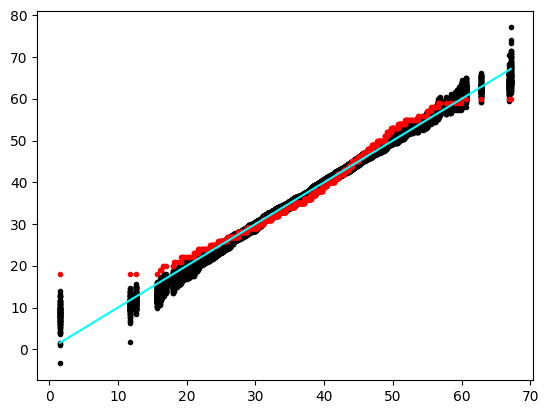

In [13]:
x_ref = np.sort(norm.rvs(loc_n, scale_n, size=len(att_no)))  # This is equivalent to the ECDF
for i in range(100):
    x_rvs = np.sort(norm.rvs(loc_n, scale_n, size=len(att_no)))  # This is equivalent to the ECDF
    plt.plot(x_ref, x_rvs, '.k')  # Q-Q plot
plt.plot(x_ref, np.sort(att_no), '.r') # Q-Q plot
plt.plot(x_ref, x_ref, 'cyan')  # line y = x

### Fuentes y recursos

- https://anaconda.org/marsgr6/distribution_fitting_r/notebook
- https://www.hec.usace.army.mil/confluence/sspdocs/sspum/2.3/distribution-fitting-analysis/distribution-fitting-and-parameter-estimation
- https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd
- https://mattblackwell.github.io/gov2002-book/02_estimation.html
- https://arize.com/blog-course/kolmogorov-smirnov-test/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=468d3185-d200-4f9b-a3ed-ece1001be9fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>